# Third Project EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px

# 🛠️ Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 📂 Load the dataset
df = pd.read_csv("/content/netflix_titles.csv")  # Change filename if needed
print("Dataset shape:", df.shape)
display(df.head())

# 🧹 Data Cleaning
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill missing values appropriately
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('No Cast Info')
df['director'] = df['director'].fillna('No Director Info')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('0 min')
df.dropna(subset=['date_added'], inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())


# Convert date column with error handling
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True) # Remove rows where date_added could not be parsed

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Process duration into integer and type
df['duration_type'] = df['duration'].apply(lambda x: x.split()[-1])
df['duration_int'] = df['duration'].apply(lambda x: ''.join(x.split()[:-1])).astype(int)

# 🔍 Dataset Overview
print("\nData Types:\n", df.dtypes)
print("\nUnique Content Types:", df['type'].unique())
print("\nTop 5 Countries:\n", df['country'].value_counts().head())

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Missing values before cleaning:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Data Types:
 show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
year_added                int32
month_add

/tmp/ipython-input-8-3590921274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


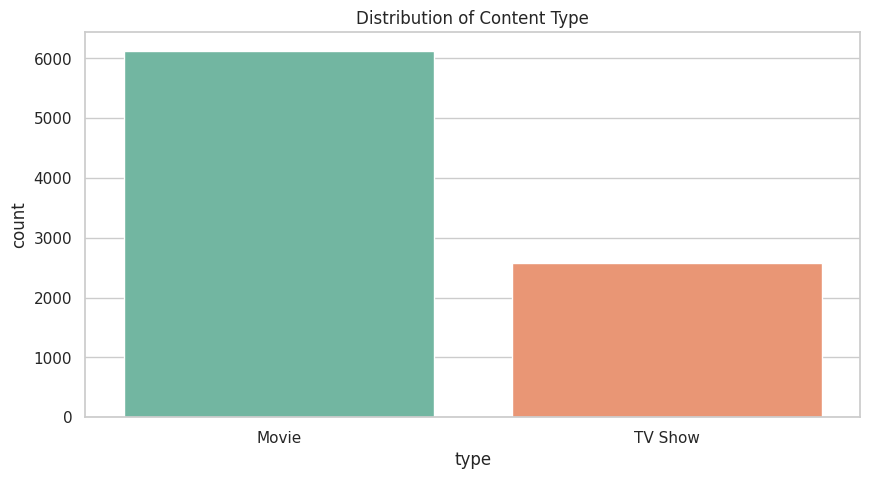

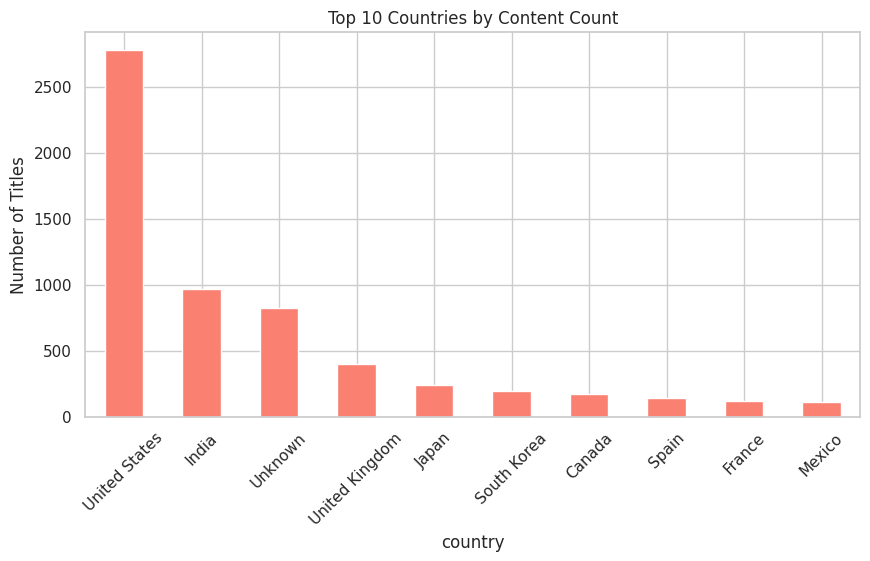

/tmp/ipython-input-8-3590921274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


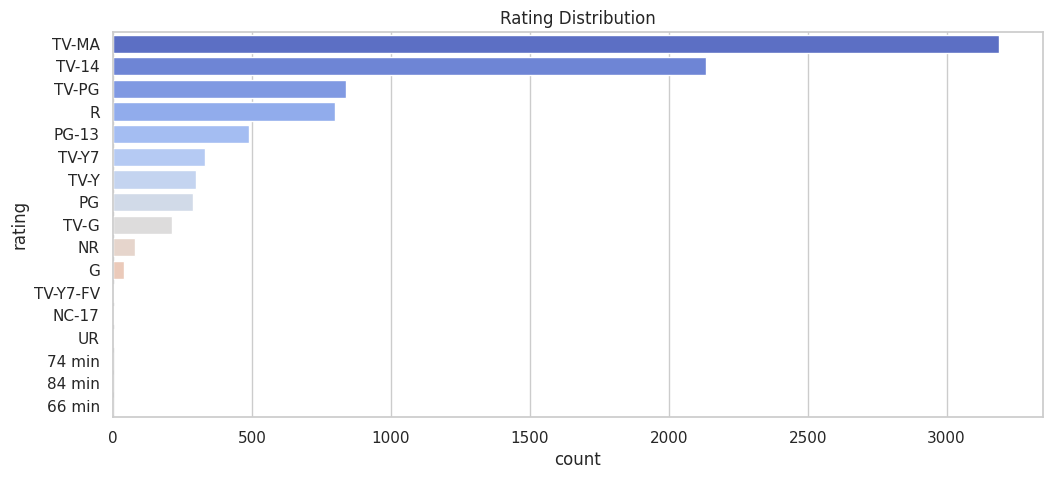

In [8]:
# Content type count
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.show()

# Top 10 countries by content
df['country'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Countries by Content Count')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Distribution of ratings
plt.figure(figsize=(12,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Rating Distribution')
plt.show()


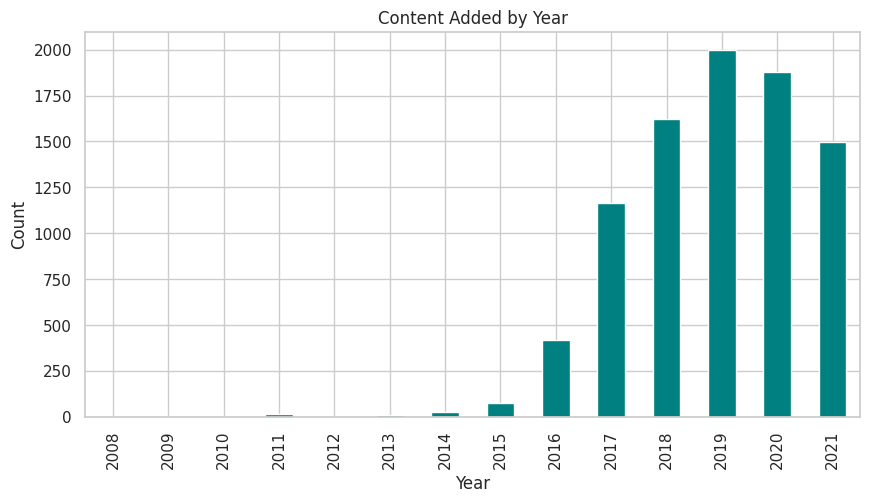

In [9]:
# Number of titles added each year
df['year_added'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Content type over time
df_grouped = df.groupby(['year_added', 'type']).size().reset_index(name='counts')
fig = px.line(df_grouped, x='year_added', y='counts', color='type', title='Content Added Over Time by Type')
fig.show()


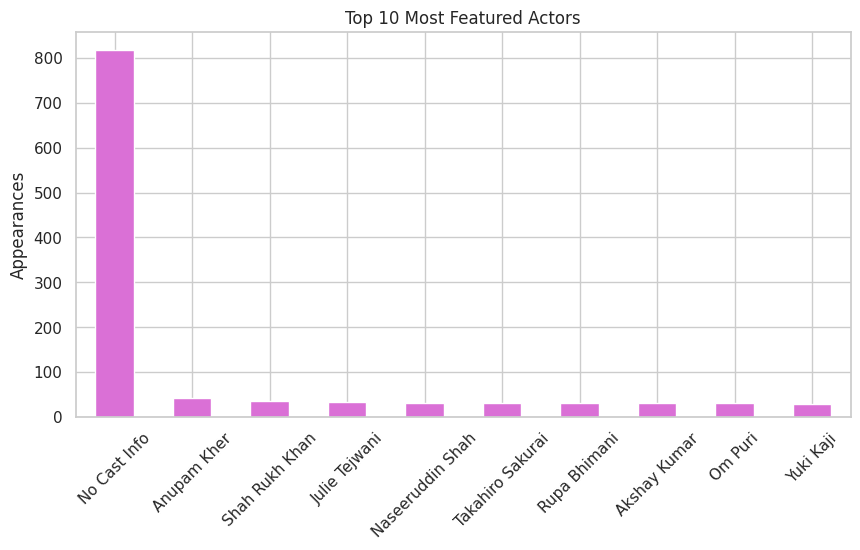

In [10]:
# Most frequent actors
cast_series = df['cast'].str.split(', ')
cast_flat = [person for sublist in cast_series.dropna() for person in sublist]
top_actors = pd.Series(Counter(cast_flat)).sort_values(ascending=False).head(10)

top_actors.plot(kind='bar', color='orchid')
plt.title('Top 10 Most Featured Actors')
plt.ylabel('Appearances')
plt.xticks(rotation=45)
plt.show()


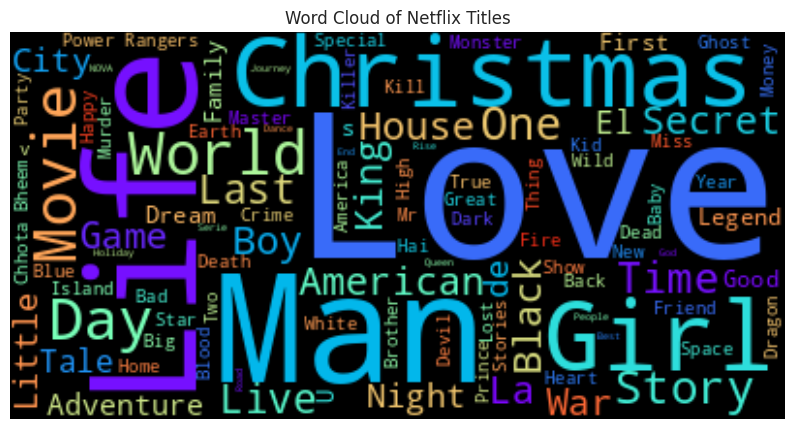

In [11]:
# Word cloud of titles
title_words = ' '.join(df['title'].astype(str))
wc = WordCloud(background_color='black', max_words=100, colormap='rainbow').generate(title_words)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()


/tmp/ipython-input-12-2938463656.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




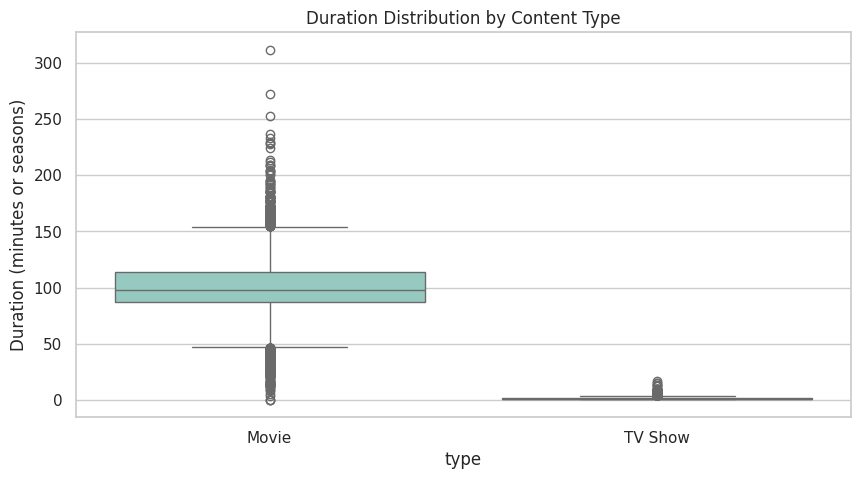

/tmp/ipython-input-12-2938463656.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




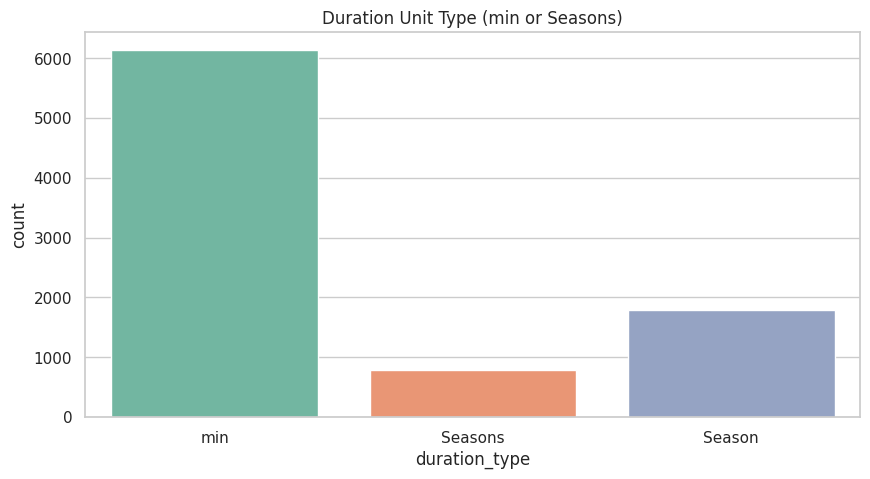

In [12]:
# Compare durations between Movies and TV Shows
sns.boxplot(data=df, x='type', y='duration_int', palette='Set3')
plt.title('Duration Distribution by Content Type')
plt.ylabel('Duration (minutes or seasons)')
plt.show()

# Duration type distribution
sns.countplot(data=df, x='duration_type', palette='Set2')
plt.title('Duration Unit Type (min or Seasons)')
plt.show()
